# Find correlations between MS data and panelist data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D      
from scipy import stats  

#### Import all data
ms_data = dataframe with normalised intensites : samples x molecules

using first replicate

In [2]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data_original = data.drop(columns=["replicate"])
ms_data = ms_data_original.copy()
ms_data = ms_data.apply(lambda row: row/row.mean(),axis=1)
ms_data = stats.zscore(np.log(ms_data))


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [3]:
ms_data.iloc[0:5,0:5]

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4
sample_key,,,,,
000920,0.483619,-0.114381,-0.322851,-0.766861,0.676691
000922,-0.673300,-0.710644,-0.256912,-0.024654,0.753509
000927,-0.592356,-0.713052,0.384683,0.686874,0.625205
000911,-0.940888,-1.354943,0.314467,0.654694,0.962180
000925,-0.577039,-0.472778,-0.150522,0.287070,0.773625


panelist_data_df = dataframe with panelist data : samples x flavors

using values from 1. panelist

In [4]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

In [5]:
panelist_data_df.iloc[0:5,0:5]

,Floral,Fruity,Woody,Complexity,Malt
samplekey,,,,,
000656,50,20,60,50,30
000657,30,40,60,40,40
000658,30,50,50,50,40
000661,60,70,60,50,50
000662,40,60,50,50,50


show distribution of each flavor in the panelist data

In [6]:
flavors = ['Floral','Fruity','Woody','Complexity','Malt','Sweet','Peaty','Dried_fruits','Aftertaste']

get only comparable samplekeys = 197 samples


In [7]:
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

##### distribution of flavor in panelist data

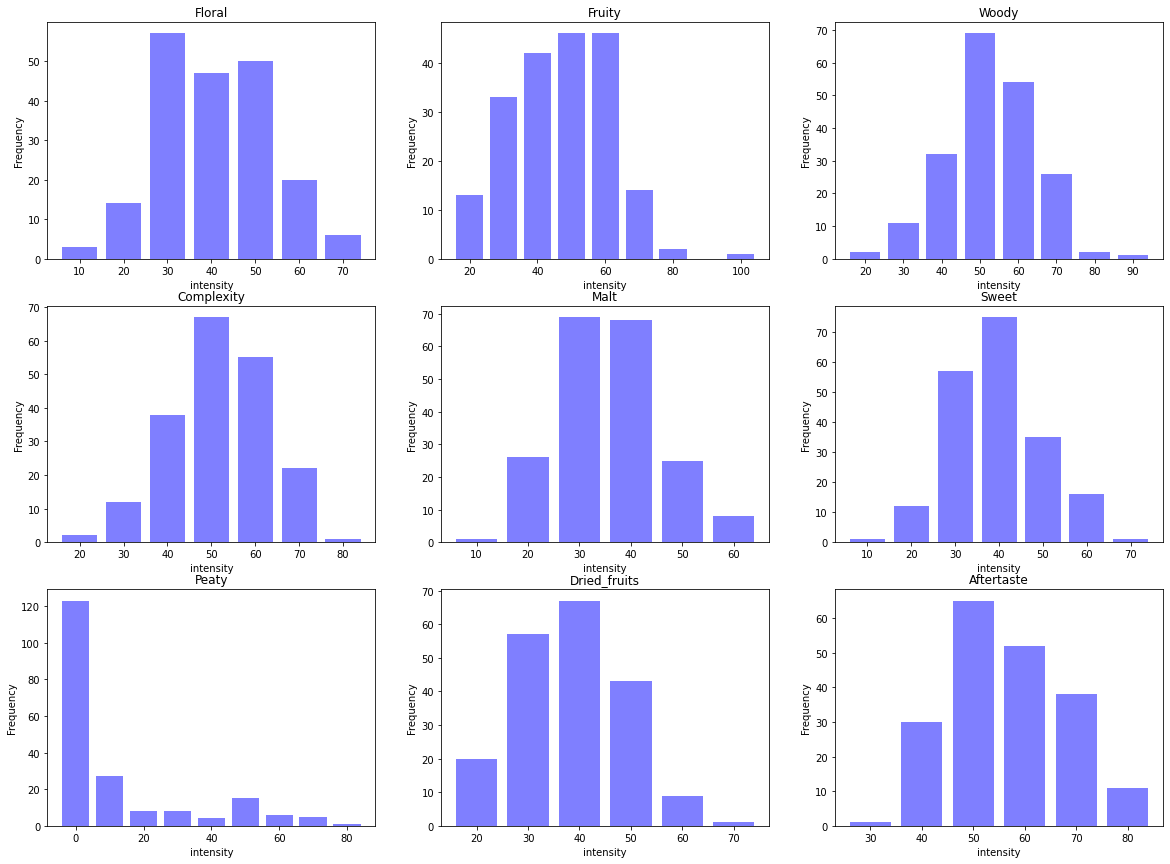

In [8]:
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_comp[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='b',alpha = 0.5,width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


### Find all descriptors for each flavor: Sweet, Fruity, Woody, Malt

In [9]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol

,CAS
(-)-carvone,6485-40-1
(-)-cis-rose oxide,3033-23-6
(-)-cubenol,21284-22-0
(-)-nootkatone,38427-78-0
(-)-β-bisabolene,495-61-4
...,...
δ-dodecalactone,713-95-1
δ-elemene,20307-84-0
δ-muurolene,120021-96-7
δ-terpinene,586-62-9


sweet_descriptors =  all molecules that where labeled as sweet in flavornet

analog for other flavors

In [10]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]
wood_descriptors = ["α-muurolene","cadina-1,4-dien-3-ol","isocaryophyllene","eudesmol","α-ionone","bornyl butyrate","(E)-α-bergamotene","linalool oxide","ethyl pyrazine","10-epi-γ-eudesmol","germacrene B","trans-sabinene hydrate","dihydrolinalool","isodihydrocarveol","β-farnesene","β-sesquiphellandrene","δ-elemene","α-calacorene","epoxy-β-ionone","germacrene D","bicyclogermacrene","alloaromadendrene","α-thujene","oxo-β-ionone","(-)-γ-elemene","γ-muurolene","sabinene","α-guaiene","α-copaene","γ-cadinene","nerolidol","β-eudesmol","α-cadinol","δ-cadinene","dill apiol","aromadendrene","α-gurjunene","guaiol","α-farnesene","γ-selinene","cuminica lcohol","perillen","elemol","α-humulene","β-caryophyllene","β-guaiene"]
malt_descriptors = ["pentanal","3-methyl-1-butanol","2-methyl-1-butanol","methylbutanal","isobutyraldehyde"]

In [11]:
violin_df = pd.DataFrame.copy(ms_data_comp)

In [12]:
def add_category(descriptors, flavor, under_bond,upper_bond):
    descriptors_CAS = [CAS_to_mol.loc[index]['CAS'] for index in descriptors if index in CAS_to_mol.index]
    sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= upper_bond].index
    true_sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= upper_bond].index
    false_sample_ids = panelist_data_comp[panelist_data_comp[flavor]<= under_bond].index
    violin_df["category_" + str(flavor)]= list((pd.Series(violin_df.index)).apply((lambda x: 1 if x in true_sample_ids else (-1 if x in false_sample_ids else 0))))

In [13]:
print(panelist_data_comp['Sweet'].median())
print(panelist_data_comp['Fruity'].median())
print(panelist_data_comp['Woody'].median())
print(panelist_data_comp['Malt'].median())


40.0
50.0
50.0
40.0


In [14]:
add_category(sweet_descriptors, "Sweet", 20,50)
add_category(fruit_descriptors, "Fruity",30,70)
add_category(wood_descriptors, "Woody",40,70)
add_category(malt_descriptors,"Malt", 20,50 )

In [15]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]
wood_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in wood_descriptors if index in CAS_to_mol.index]
malt_descriptors_CAS  =[CAS_to_mol.loc[index]["CAS"] for index in malt_descriptors if index in CAS_to_mol.index]

violin_df = containing all CAS numbers and comparable samples plus their category refering to if the sample was categorized distinct flavor ot not or is average regarding the panelist data

In [16]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category_Sweet,category_Fruity,category_Woody,category_Malt
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,0.654597,0.504045,-0.484121,-1.124328,-0.873298,-0.873298,-0.004999,0.654597,0.654597,0.504045,...,0.813270,-0.861840,-0.873298,-0.873298,0.070743,-0.492603,0,-1,0,0
000657,0.164214,0.928648,-0.799496,-1.270475,-1.071480,-1.071480,-0.003429,0.164214,0.164214,0.928648,...,0.795232,-1.112654,-1.071480,-1.071480,-0.473292,-0.653023,0,0,0,0
000658,0.289073,0.135427,0.126255,0.124218,-0.106765,-0.106765,0.589666,0.289073,0.289073,0.135427,...,0.538315,-0.160557,-0.106765,-0.106765,0.219140,-0.758779,0,0,0,0
000838,1.043792,-0.229280,1.810010,1.741901,1.079154,1.079154,-1.540093,1.043792,1.043792,-0.229280,...,-1.725093,-0.023330,1.079154,1.079154,1.156936,0.859872,1,1,0,0
000839,2.139363,0.751552,1.659463,1.118391,-0.010795,-0.010795,-2.163393,2.139363,2.139363,0.751552,...,-1.634097,-0.517266,-0.010795,-0.010795,-1.017367,-0.230018,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,-0.577039,-0.472778,-0.150522,0.287070,0.773625,0.773625,0.726969,-0.577039,-0.577039,-0.472778,...,1.155112,0.694950,0.773625,0.773625,-0.414200,0.490748,0,0,0,0
000926,0.636501,-0.458241,0.087082,0.355739,0.241522,0.241522,0.436841,0.636501,0.636501,-0.458241,...,1.047632,0.081468,0.241522,0.241522,0.563532,0.254898,0,0,0,0
000927,-0.592356,-0.713052,0.384683,0.686874,0.625205,0.625205,1.143411,-0.592356,-0.592356,-0.713052,...,0.965866,0.440485,0.625205,0.625205,-0.034912,-0.038107,1,0,0,0


### Correlation over all samples

cas numbers which are labeled as sweet should be higly expressed in sweet samples and vice versa

analog to the other samples

In [34]:
'''
if the difference is high than H0 ist true and cas is significant, meaning over all labeled samples it is highly expressed for the flavor it was labeld with 
'''
def check_CAS(df,CAS, OSA):
    # check mean of one cas number over all sweet samples is higher than mean of cas numbers over all not sweet samples
    # add entries for other OSAs in the future
    flavor_true = df[df["category_" + OSA] == 1].index
    flavor_false = df[df["category_"+ OSA] == -1].index
    mean_flavor_true = np.mean(df[CAS].loc[flavor_true])
    mean_flavor_false = np.mean(df[CAS].loc[flavor_false])
    #print("flavor_true:"+str(mean_flavor_true))
    #print("flavor_false:"+str(mean_flavor_false))
    difference=mean_flavor_true-mean_flavor_false
    return difference

#### check two example CAS numbers

2463-77-6: sweet

6485-40-1: not sweet

In [35]:
check_CAS(violin_df,'2463-77-6','Sweet')

0.5761309675024383

In [36]:
check_CAS(violin_df, '6485-40-1', 'Sweet')

0.15027197348318738

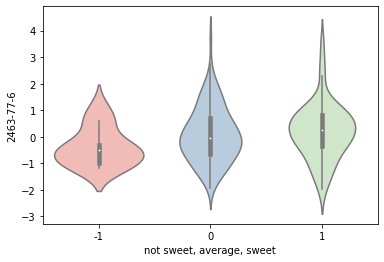

In [37]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category_Sweet',y= '2463-77-6', data=violin_df, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

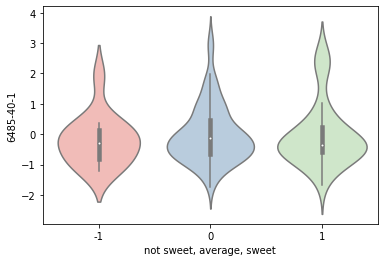

In [38]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category_Sweet',y= '6485-40-1' , data=violin_df[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

#### check labeled molecules per flavor  over all samples

looking at e.g all sweet CAS numbers and how the intensity of these change in sweet, average sweet and not sweet samples

In [17]:
def get_flavored_CAS(desc_CAS, flavor):
    # filter for CAS numbers labeled sweet
    flavor_cas_vdf = pd.DataFrame.copy(violin_df[desc_CAS] )
    flavor_cas_vdf['category_' + str(flavor)] = pd.DataFrame.copy(violin_df['category_'+ str(flavor)])
    flavor_cas_vdf["sum"]= flavor_cas_vdf.apply(lambda row:row[0:-1].sum(), axis=1)
    flavor_cas_vdf["mean"]= flavor_cas_vdf.apply(lambda row:row[0:-2].mean(), axis=1)
    flavor_cas_vdf["median"]= flavor_cas_vdf.apply(lambda row:row[0:-3].median(), axis=1)
    return(flavor_cas_vdf)

In [18]:
# create df for each flavor
sweet_cas_violin_df = get_flavored_CAS(sweet_descriptors_CAS,"Sweet")
woody_cas_violin_df = get_flavored_CAS(wood_descriptors_CAS,"Woody")
fruity_cas_violin_df = get_flavored_CAS(fruit_descriptors_CAS,"Fruity")
malt_cas_violin_df = get_flavored_CAS(malt_descriptors_CAS,"Malt")

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\

In [19]:
malt_cas_violin_df
# not enough data -> exclude from analysis

,110-62-3,123-51-3,137-32-6,590-86-3,78-84-2,category_Malt,sum,mean,median
sample_key,,,,,,,,,
000656,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000657,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000658,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000838,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000839,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
000925,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000926,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000927,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


In [20]:
sweet_cas_violin_df_labeled = sweet_cas_violin_df.copy()
sweet_cas_violin_df_labeled['category_Sweet_label'] = sweet_cas_violin_df_labeled['category_Sweet'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

sweet_cas_violin_df_labeled = sweet_cas_violin_df_labeled.drop(columns=['category_Sweet'])

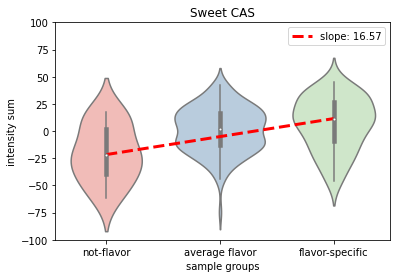

In [21]:
# looking at all cas number which were categories as sweet over all samples

sns.violinplot(x='category_Sweet_label', y='sum', data=sweet_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])


# lines
medians = sweet_cas_violin_df_labeled.groupby("category_Sweet_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 
slope = (y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])

plt.plot(x_vals, y_vals, color='r', linestyle='--', linewidth=3, label=f'slope: {slope:.2f}')

plt.legend()

plt.title("Sweet CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.ylim(-100, 100)
plt.show()

In [22]:
fruity_cas_violin_df_labeled = fruity_cas_violin_df.copy()
fruity_cas_violin_df_labeled['category_Fruity_label'] = fruity_cas_violin_df_labeled['category_Fruity'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

fruity_cas_violin_df_labeled = fruity_cas_violin_df_labeled.drop(columns=['category_Fruity'])

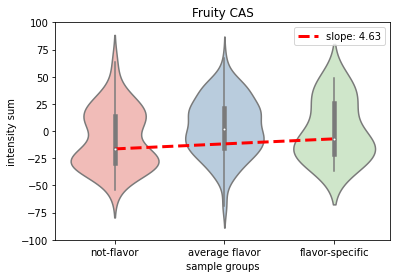

In [23]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Fruity_label', y='sum', data=fruity_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])

# lines
medians = fruity_cas_violin_df_labeled.groupby("category_Fruity_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 

slope = (y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])

plt.plot(x_vals, y_vals, color='r', linestyle='--', linewidth=3, label=f'slope: {slope:.2f}')

plt.title("Fruity CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.ylim(-100,100)
plt.legend()
plt.show()

In [25]:
woody_cas_violin_df_labeled = woody_cas_violin_df.copy()
woody_cas_violin_df_labeled['category_Woody_label'] = woody_cas_violin_df_labeled['category_Woody'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

woody_cas_violin_df_labeled = woody_cas_violin_df_labeled.drop(columns=['category_Woody'])

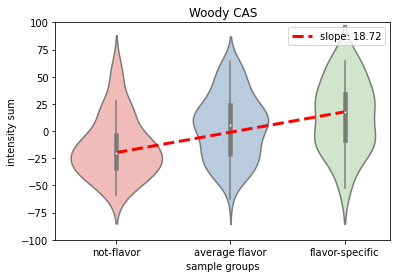

In [26]:
# looking at all cas number which were categories as woody over all samples
sns.violinplot(x='category_Woody_label', y='sum', data=woody_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])

# lines
medians = woody_cas_violin_df_labeled.groupby("category_Woody_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 

slope = (y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])

plt.plot(x_vals, y_vals, color='r', linestyle='--', linewidth=3, label=f'slope: {slope:.2f}')

plt.title("Woody CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.ylim(-100,100)
plt.legend()
plt.show()


#### visualizing which cas numbers are significant and which are not

In [27]:
def plot_diff_exp_CAS(df,flavor):
    flavor_true = df[df["category_" + str(flavor)] == 1].index
    flavor_false = df[df["category_" + str(flavor)] == -1].index
    
    plt.figure(figsize=(50, 10))           
    plt.bar(df.loc[flavor_true].iloc[:,:-4].columns, df.loc[flavor_true].iloc[:,:-4].mean(axis=0), color='b', alpha=0.5)
    plt.bar(df.loc[flavor_false].iloc[:,:-4].columns, df.loc[flavor_false].iloc[:,:-4].mean(axis=0),color="g",  alpha=0.5)

    plt.axhline(0, color='grey', linewidth=1)  # Add a horizontal line at y=0 (color: grey)

    plt.xlabel('CAS numbers')
    plt.ylabel('intensities over all samples')
    plt.title('labeled CAS numbers x intensities over all samples ')
    legend_entries = [Line2D([0], [0], color='b', lw=4, label=str(flavor) + ' samples'),
                    Line2D([0], [0], color='g', lw=4, label='not ' +str(flavor) +' samples')]
    plt.legend(handles=legend_entries, loc='upper right')
    plt.ylim(-1,1)
    plt.show()


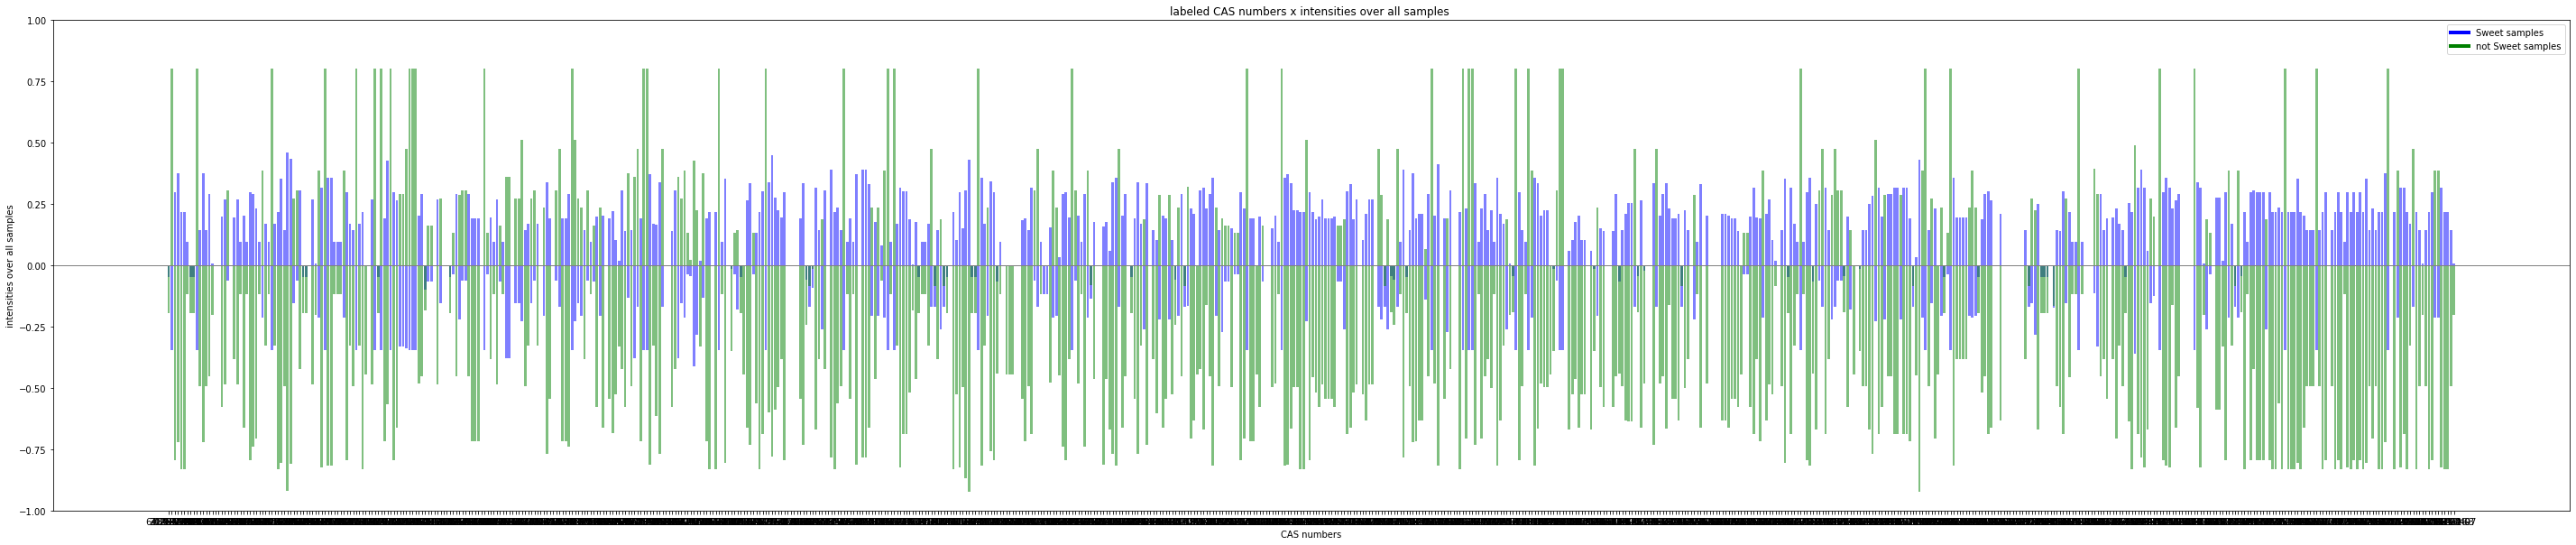

In [28]:
plot_diff_exp_CAS(violin_df,"Sweet")

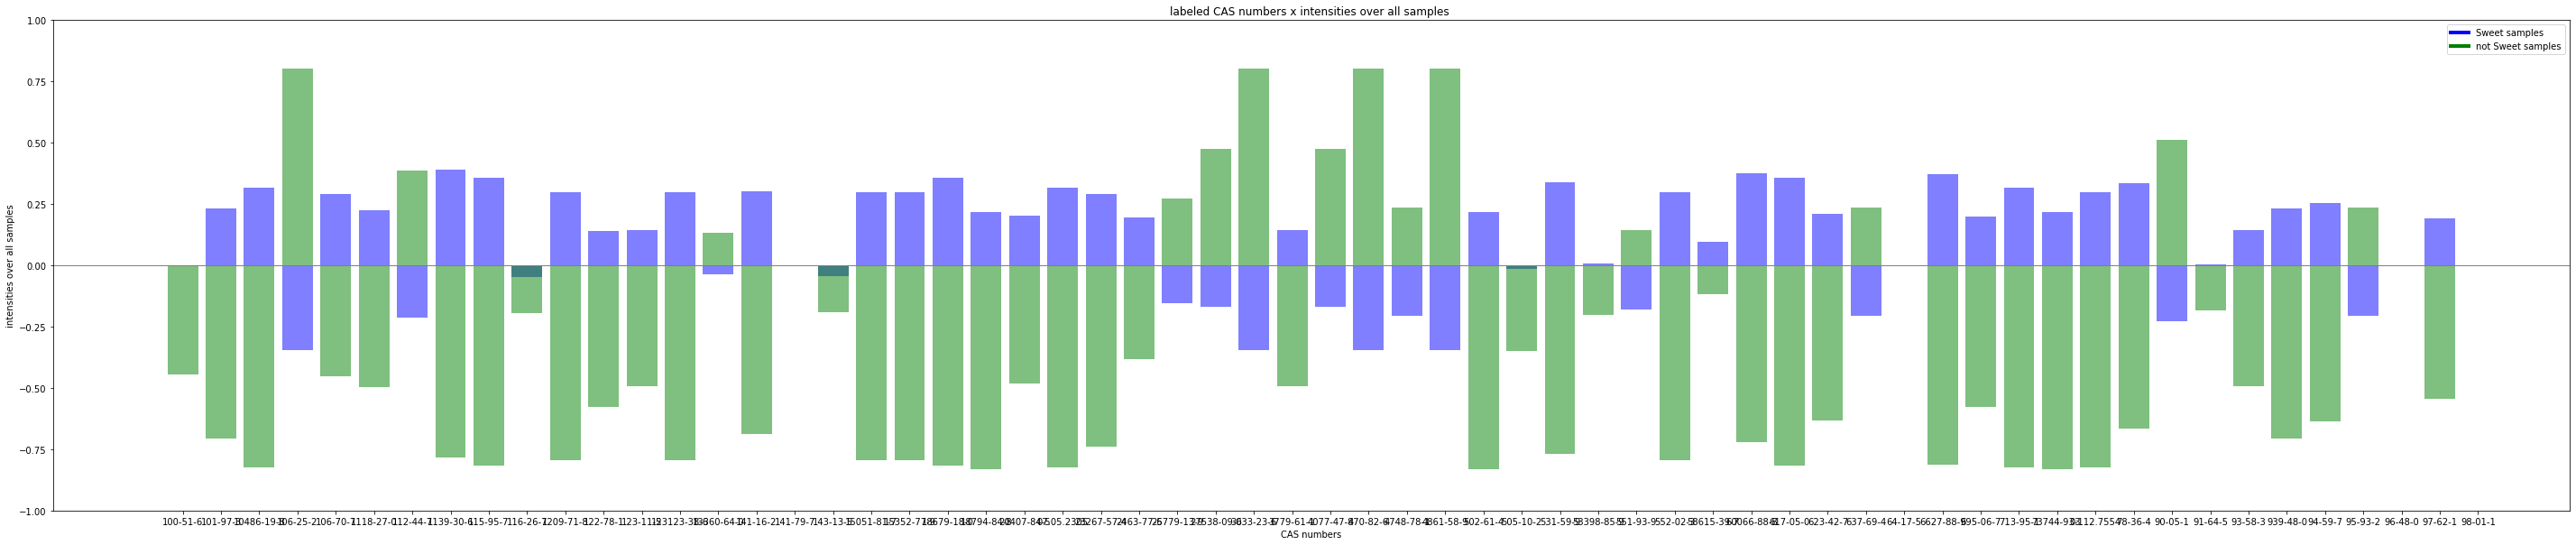

In [29]:
plot_diff_exp_CAS(sweet_cas_violin_df,"Sweet")

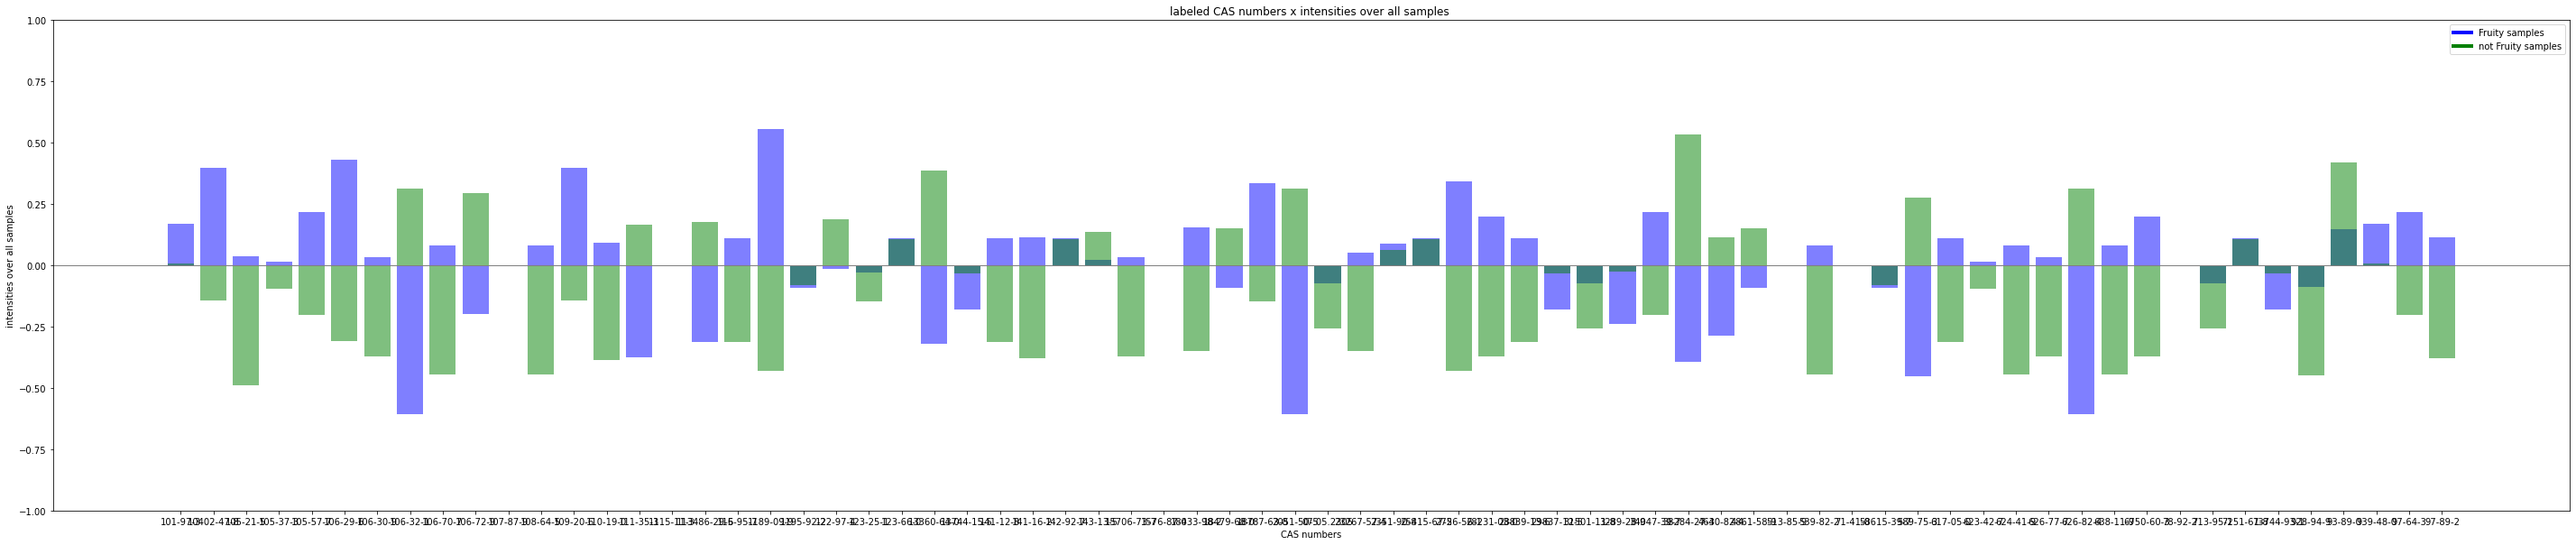

In [30]:
plot_diff_exp_CAS(fruity_cas_violin_df,"Fruity")

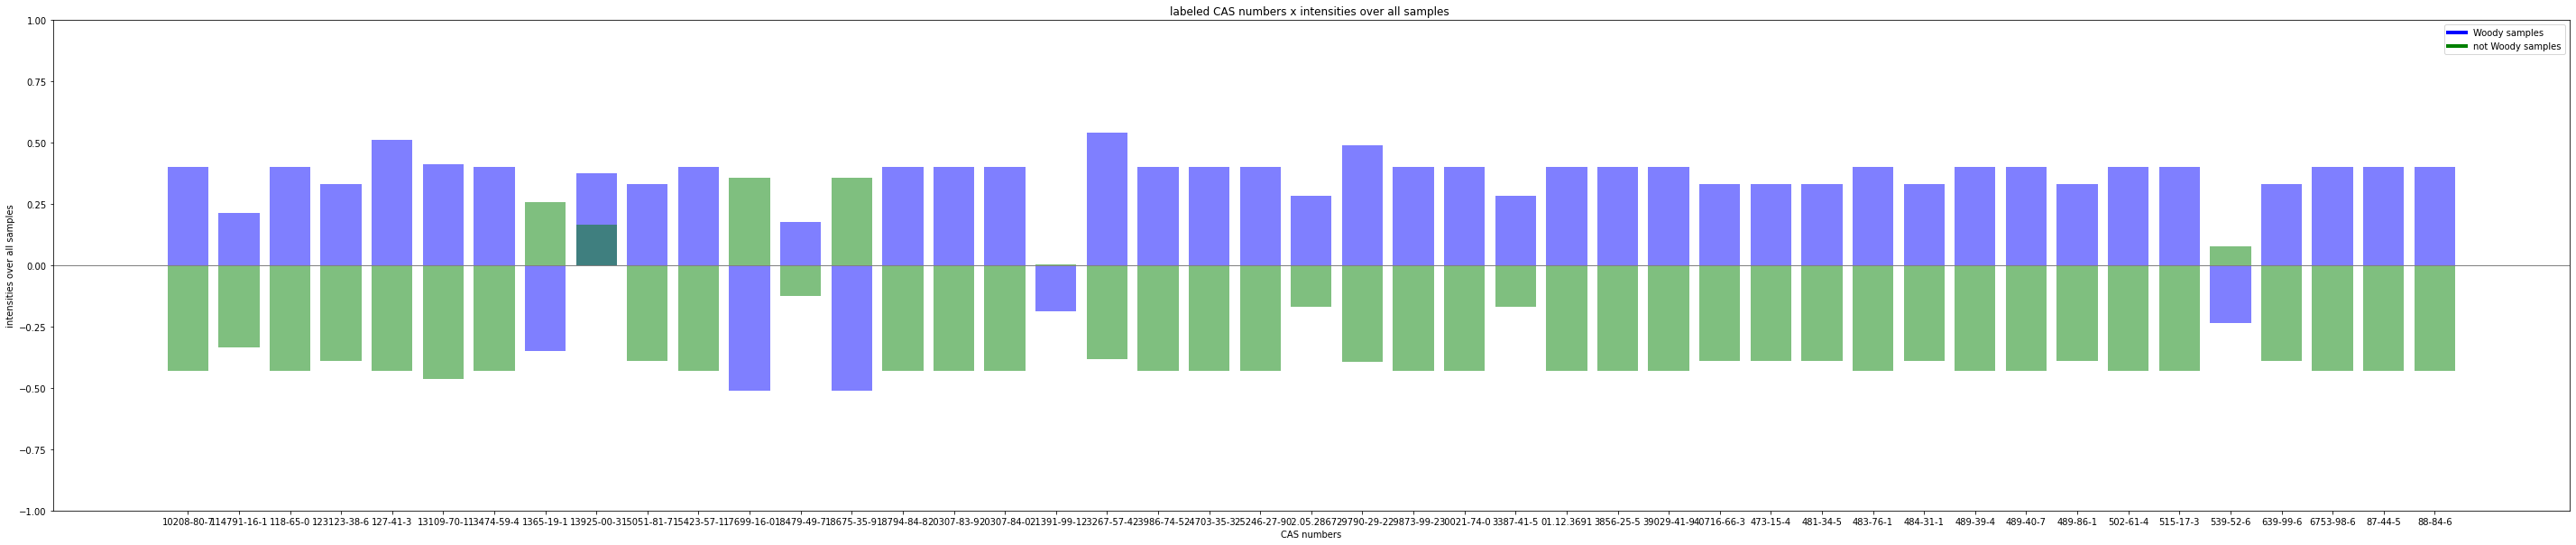

In [31]:
plot_diff_exp_CAS(woody_cas_violin_df,"Woody")

## T - Test
### checking difference of intensity for one CAS between different samples

In [39]:
flavor_true = violin_df[violin_df["category_Sweet"] == 1].index
flavor_false = violin_df[violin_df["category_Sweet"] == -1].index
t_stat, p_val = stats.ttest_ind(violin_df['10486-19-8'].loc[flavor_true], violin_df['10486-19-8'].loc[flavor_false])  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))


t-statistic = 3.6424573962037883
p-value = 0.0005475276703364414


In [40]:
# positiv = significant
check_CAS(violin_df,'10486-19-8','Sweet')

1.1384967306354918

### checking difference of intensity for all CAS between different samples

In [43]:
def check_significant_CAS(df, flavor):
    #check this for all Cas numbers that are available
    alpha = 0.05
    labels=[]
    p_values = []
    significant_CAS =[]
    flavor_true = df[df["category_"+ flavor] == 1].index
    flavor_false = df[df["category_"+flavor] == -1].index
    for CAS in df.iloc[:,:-4].columns:
        t_stat, p_val = stats.ttest_ind(df[CAS].loc[flavor_true], df[CAS].loc[flavor_false])  
        '''print("CAS: " +str(CAS))
        print("t-statistic = " + str(t_stat))  
        print("p-value = " + str(p_val))'''
        labels.append(CAS)
        p_values.append(p_val)
        if p_val < alpha:
            significant_CAS.append(CAS)
    return(labels, p_values, significant_CAS)

## FN labeled molecules

#### sweet

In [44]:
sweet_label, sweet_p_val, sweet_sig_CAS = check_significant_CAS(sweet_cas_violin_df, "Sweet")

In [45]:
# rate of significant molecules
len(sweet_sig_CAS)/len(sweet_cas_violin_df.iloc[:,:-4].columns)

0.6885245901639344

In [46]:
len(sweet_sig_CAS)

42

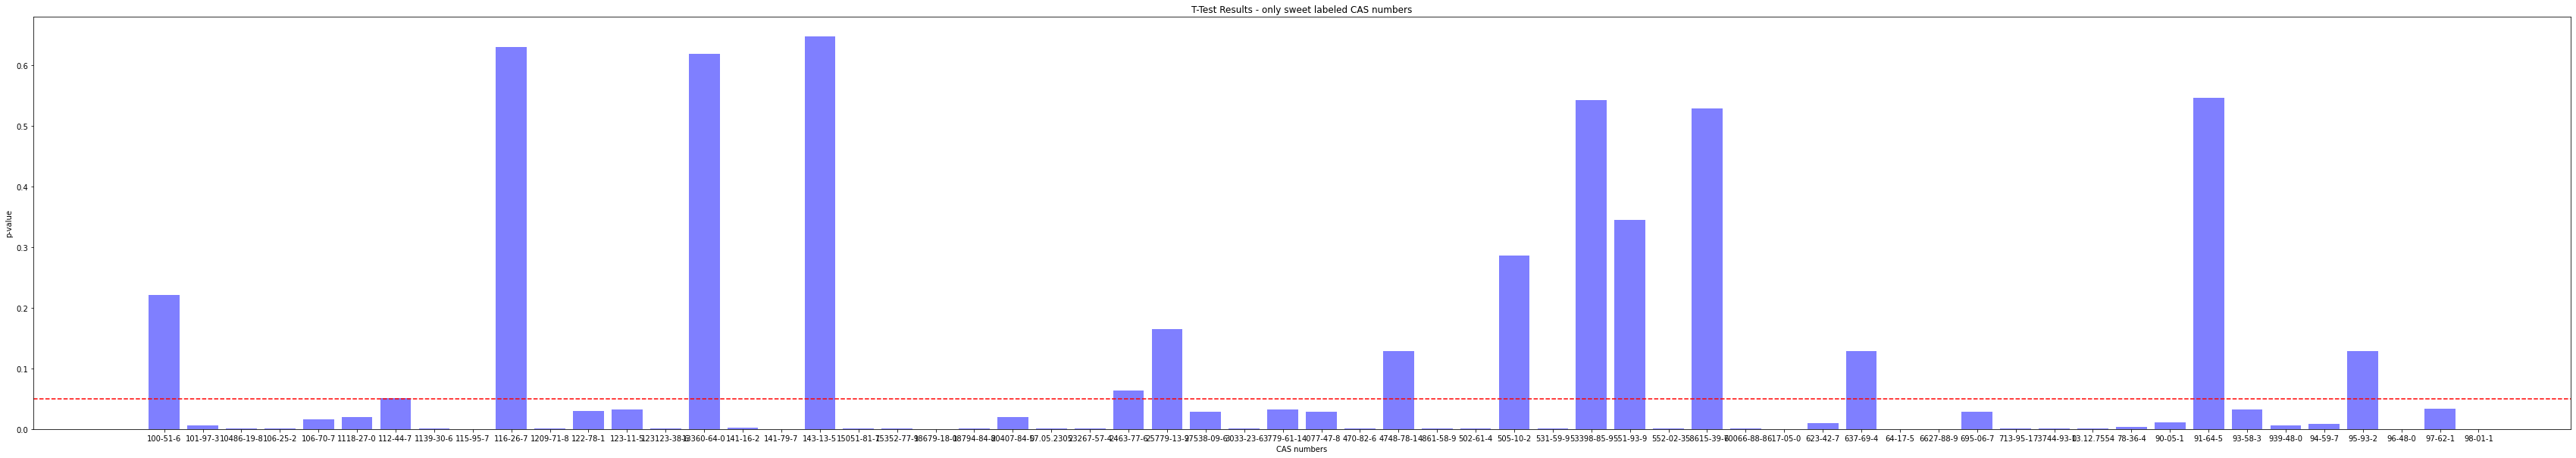

In [47]:
# bar chart of p values
alpha = 0.05
plt.figure(figsize=(60, 10))           
plt.bar(sweet_label, sweet_p_val, color = 'b', alpha = 0.5)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers')
plt.ylabel('p-value')
plt.title('T-Test Results - only sweet labeled CAS numbers')
plt.show()


### fruity

In [48]:
fruity_label, fruity_p_val, fruity_sig_CAS = check_significant_CAS(fruity_cas_violin_df,'Fruity')

In [50]:
# rate of significant molecules
len(fruity_sig_CAS)/len(fruity_label)

0.24285714285714285

In [51]:
len(fruity_sig_CAS)

17

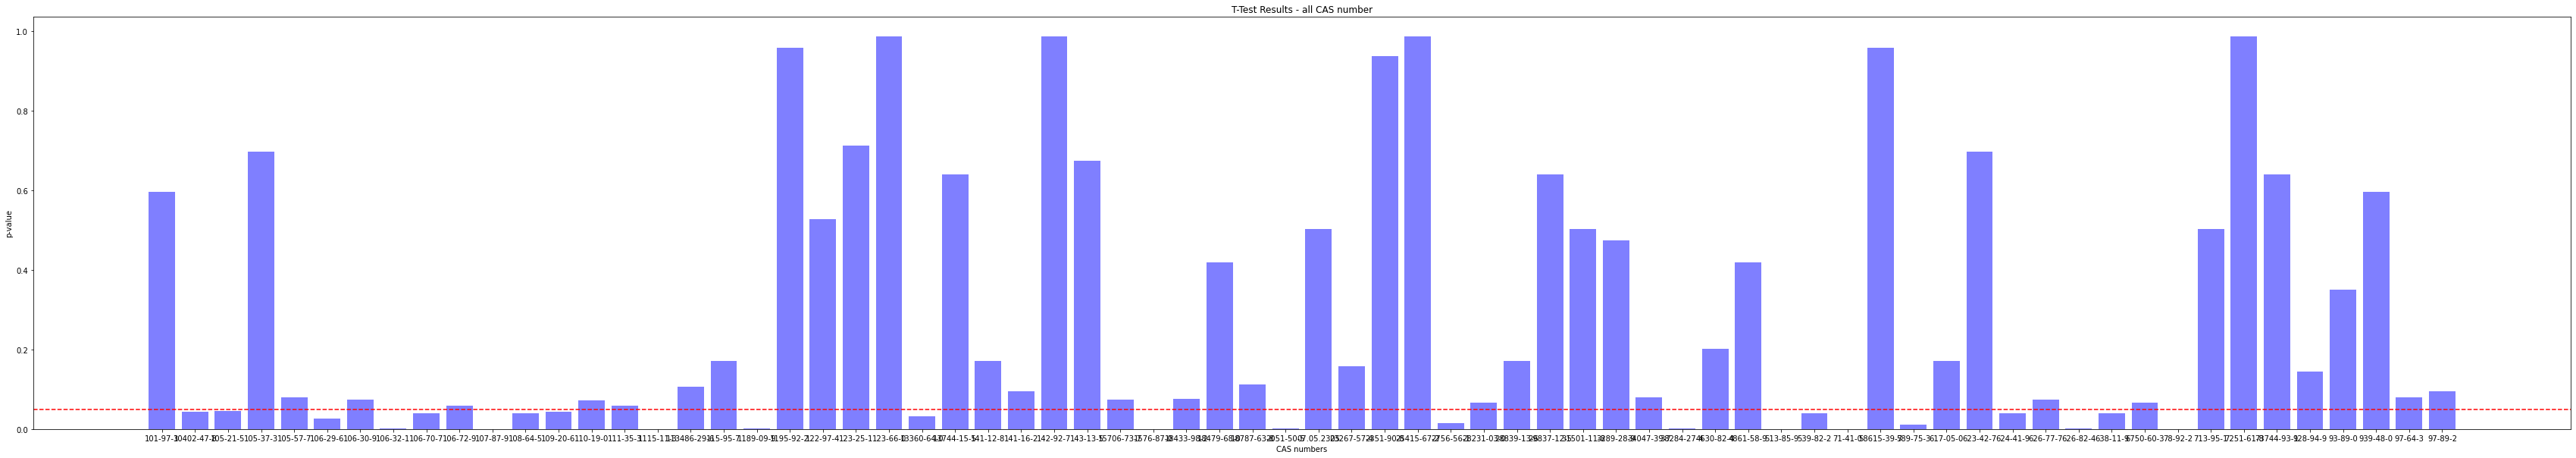

In [52]:
# bar chart of p values
plt.figure(figsize=(60, 10))           
plt.bar(fruity_label, fruity_p_val, color = 'b', alpha = 0.5)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')

plt.show()


### woody

In [53]:
woody_label, woody_p_val, woody_sig_CAS = check_significant_CAS(woody_cas_violin_df,'Woody')

In [54]:
# rate of significant molecules
len(woody_sig_CAS)/len(woody_label)

0.9111111111111111

In [55]:
len(woody_sig_CAS)

41

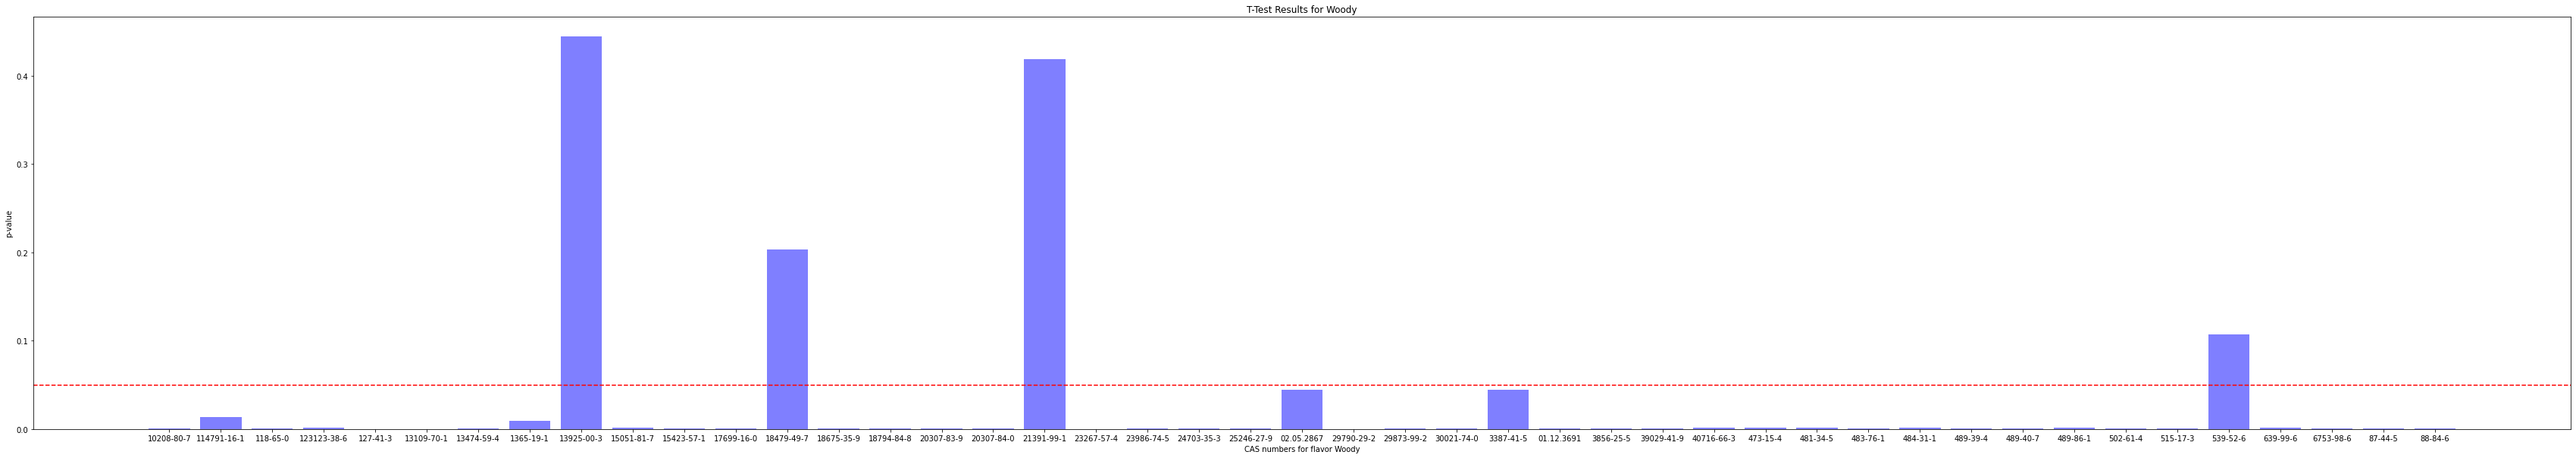

In [56]:
# bar chart of p values
plt.figure(figsize=(60, 10))           
plt.bar(woody_label, woody_p_val, color='b', alpha=0.5)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers for flavor Woody')
plt.ylabel('p-value')
plt.title('T-Test Results for Woody')

plt.show()


#### all CAS numbers regardless the lable


#### sweet

In [57]:
label_all_sweet,p_val_all_sweet, significant_CAS_all_sweet = check_significant_CAS(violin_df,'Sweet')

In [58]:
print(len(significant_CAS_all_sweet))
print(len(significant_CAS_all_sweet)/len(label_all_sweet))

398
0.5437158469945356


#### woody

In [59]:
label_all_woody,p_val_all_woody, significant_CAS_all_woody = check_significant_CAS(violin_df,'Woody')


In [60]:
print(len(significant_CAS_all_woody))
print(len(significant_CAS_all_woody)/len(label_all_woody))

444
0.6065573770491803


#### fruity

In [61]:
label_all_fruity,p_val_all_fruity, significant_CAS_all_fruity = check_significant_CAS(violin_df,'Fruity')


In [62]:
print(len(significant_CAS_all_fruity))
print(len(significant_CAS_all_fruity)/len(label_all_fruity))

139
0.18989071038251365


In [63]:
#SUMMARY: 
print('significant molecules')
print("FN Sweet: " + str(len(sweet_sig_CAS)))
print("all Sweet: " + str(len(significant_CAS_all_sweet)))
print("FN Fruity: " + str(len(fruity_sig_CAS)))
print("all Fruity: " + str(len(significant_CAS_all_fruity)))
print("FN Woody: " + str(len(woody_sig_CAS)))
print("all Woody: " + str(len(significant_CAS_all_woody)))

significant molecules
FN Sweet: 42
all Sweet: 398
FN Fruity: 17
all Fruity: 139
FN Woody: 41
all Woody: 444


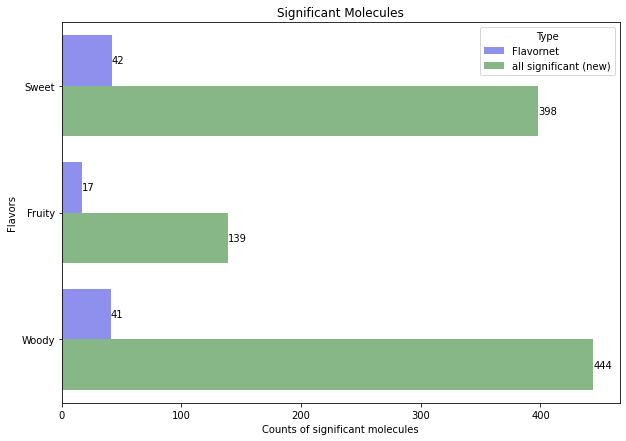

In [64]:
categories = ['Sweet', 'Fruity', 'Woody']
counts_FN = [len(sweet_sig_CAS), len(fruity_sig_CAS), len(woody_sig_CAS)]
counts_All = [len(significant_CAS_all_sweet), len(significant_CAS_all_fruity), len(significant_CAS_all_woody)]

df = pd.DataFrame({'Category': categories + categories, 
                   'Counts': counts_FN + counts_All, 
                   'Type': ['Flavornet']*len(categories) + ['all significant (new)']*len(categories)})

plt.figure(figsize=(10, 7))
ax = sns.barplot(y='Category', x='Counts', hue='Type', data=df, palette={'Flavornet': 'b', 'all significant (new)': 'g'}, alpha=0.5)

plt.ylabel('Flavors')
plt.xlabel('Counts of significant molecules')
plt.title('Significant Molecules')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black', fontsize=10)

# Show the plot
plt.show()
